# Lead Score Case Study

In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
lead = pd.read_csv('C:/Users/JOY/OneDrive/Documents/MACHINE LEARNING/CSV files 101/logistic regression data set/Lead+Scoring+Case+Study/Lead Scoring Assignment/Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Checking the duplicated value in "Prospect ID" and "Lead Number" columns
def duplicate(row):
    print("No duplicate") if lead.duplicated(subset=row, keep=False).sum() == 0 else print('Duplicate values are there in unqiue ID') 
duplicate(['Prospect ID', 'Lead Number'])   

# Dropping the above unnecessary columns 
def dropColumnOrColumns(col):
    lead.drop(col, 1, inplace=True)
    print(f'COLUMNS DROPPED: {col}')
dropColumnOrColumns(['Prospect ID', 'Lead Number'])

lead.head()

No duplicate
COLUMNS DROPPED: ['Prospect ID', 'Lead Number']


,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Checking the information about the columns
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [6]:
# Replacing the "select" value with np.NaN value
lead = lead.replace("Select", np.NaN)

In [7]:
# Checking the percentage of Null values
round(100*(lead.isnull().sum()/lead.shape[0]), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me 

In [8]:
# Dropping the columns which have >= 45% null value
dropColumnOrColumns(['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Asymmetrique Profile Index', 'Asymmetrique Activity Index'])

COLUMNS DROPPED: ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Asymmetrique Profile Index', 'Asymmetrique Activity Index']


In [9]:
# Checking the value counts and imbalance data 
for data in lead.columns:
    print(f'{data}\n{lead[data].value_counts()}')
    print('***********************************************')

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
***********************************************
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
***********************************************
Do Not Email
No     8506
Yes     734
Name: Do Not Email, dtype: int64
****************************************

In [10]:
# Categorial variables
categorial_var = [data for data in lead.columns if lead[data].dtype == 'object']

# Checking the value counts percentage of categorail variables
lead['Lead Origin'].count()

9240

In [11]:
# Checking the value counts of all the categorail variables
for data in categorial_var:
    print(f'{data.upper()}::\n{round(100*(lead[data].value_counts()/lead[data].count()), 2).sort_values(ascending=False)}')
    print('----------------------------------------------------------------------------------------------------')

LEAD ORIGIN::
Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64
----------------------------------------------------------------------------------------------------
LEAD SOURCE::
Google               31.16
Direct Traffic       27.63
Olark Chat           19.07
Organic Search       12.54
Reference             5.80
Welingak Website      1.54
Referral Sites        1.36
Facebook              0.60
bing                  0.07
google                0.05
Click2call            0.04
Press_Release         0.02
Social Media          0.02
Live Chat             0.02
youtubechannel        0.01
testone               0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
WeLearn               0.01
blog                  0.01
NC_EDM                0.01
Name: Lead Source, dtype: float64
-----------------------------------------------------------------------

In [12]:
lead.shape

(9240, 28)

In [13]:
# Dropping the Highly skewed columns(i,e NO=100%) which are not required
dropColumnOrColumns(['What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
                    'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Do Not Email',
                    'Do Not Call', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'])

COLUMNS DROPPED: ['What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Do Not Email', 'Do Not Call', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [14]:
lead.shape

(9240, 14)

In [15]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation', 'Tags',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [16]:
lead.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Interested in other courses,NaN,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Ringing,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [17]:
# Checking the percentage of Null values
round(100*(lead.isnull().sum()/lead.shape[0]), 2).sort_values(ascending=False)

City                                      39.71
Specialization                            36.58
Tags                                      36.29
What is your current occupation           29.11
Country                                   26.63
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
Lead Origin                                0.00
Converted                                  0.00
Total Time Spent on Website                0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [18]:
# For the catogorical variable column we are imputing 'mode' for missing value 

# City
mode1 = lead['City'].mode()[0]
lead['City'] = lead['City'].replace(np.NaN, mode1)

# Specialization
mode2 = lead['Specialization'].mode()[0]
lead['Specialization'] = lead['Specialization'].replace(np.NaN, mode2)

# Tags
mode3 = lead['Tags'].mode()[0]
lead['Tags'] = lead['Tags'].replace(np.NaN, mode3)

# What is your current occupation
mode4 = lead['What is your current occupation'].mode()[0]
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.NaN, mode4)

# Country
mode5 = lead['Country'].mode()[0]
lead['Country'] = lead['Country'].replace(np.NaN, mode5)

# Last Activity
mode6 = lead['Last Activity'].mode()[0]
lead['Last Activity'] = lead['Last Activity'].replace(np.NaN, mode6)


In [19]:
# Numerical columns 

# TotalVisits
mean1 = lead['TotalVisits'].mean()
lead['TotalVisits'] = lead['TotalVisits'].fillna(mean1)

# Page Views Per Visit
mean2 = lead['Page Views Per Visit'].mean()
lead['Page Views Per Visit'] = lead['Page Views Per Visit'].fillna(mean2)

In [20]:
# Negate the "Lead Source" value 
lead = lead[~lead['Lead Source'].isnull()]

In [21]:
lead.shape

(9204, 14)

In [22]:
# Finally checking the percentage of Null values
round(100*(lead.isnull().sum()/lead.shape[0]), 2).sort_values(ascending=False)

Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

## Correlation

<AxesSubplot:>

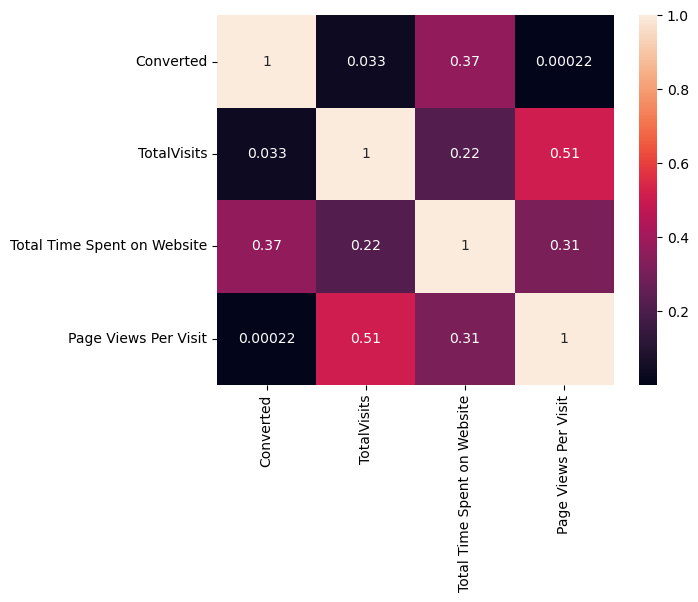

In [23]:
sns.heatmap(lead.corr(), annot=True)

In [24]:
# Renaming the columns 
lead.rename(columns={'Lead Origin': 'Lead_Origin', 
                    'Lead Source': 'Lead_Source',
                    'Total Time Spent on Website': 'Total_Time_Spent_On_Website',
                    'Page Views Per Visit': 'Page_Views_Per_Visit',
                    'Last Activity': 'Last_Activity',
                    'What is your current occupation': 'Current_Occupation',
                    'A free copy of Mastering The Interview': 'A_free_copy_of_Mastering_The_Interview',
                    'Last Notable Activity': 'Last_Notable_Activity'}, inplace=True)

## Identifing the categorical columns which are having less row count  and combining these categories and naming it to  'Other'

In [25]:
value = lead['Last_Notable_Activity'].value_counts().index[:6]
lead['Last_Notable_Activity'] = np.where(lead['Last_Notable_Activity'].isin(value), lead['Last_Notable_Activity'], 'OTHER')
lead['Last_Notable_Activity'].value_counts()

Modified                   3397
Email Opened               2823
SMS Sent                   2152
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
OTHER                       158
Name: Last_Notable_Activity, dtype: int64

In [26]:
value = lead['Last_Activity'].value_counts().index[:8]
lead['Last_Activity'] = np.where(lead['Last_Activity'].isin(value), lead['Last_Activity'], 'OTHER')
lead['Last_Activity'].value_counts()

Email Opened                 3533
SMS Sent                     2723
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 321
Email Link Clicked            267
OTHER                         203
Form Submitted on Website     116
Name: Last_Activity, dtype: int64

In [27]:
value = lead['Country'].value_counts().index[:8]
lead['Country'] = np.where(lead['Country'].isin(value), lead['Country'], 'OTHER_COUNTRIES')
lead['Country'].value_counts()

India                   8917
OTHER_COUNTRIES           82
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Name: Country, dtype: int64

In [28]:
value = lead['Current_Occupation'].value_counts().index[:3]
lead['Current_Occupation'] = np.where(lead['Current_Occupation'].isin(value), lead['Current_Occupation'], 'OTHER_OCCUPATION')
lead['Current_Occupation'].value_counts()

Unemployed              8257
Working Professional     704
Student                  209
OTHER_OCCUPATION          34
Name: Current_Occupation, dtype: int64

In [29]:
value = lead['Tags'].value_counts().index[:11]
lead['Tags'] = np.where(lead['Tags'].isin(value), lead['Tags'], 'OTHERS')
lead['Tags'].value_counts()

Will revert after reading the email    5394
Ringing                                1200
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
OTHERS                                  301
switched off                            240
Busy                                    186
Lost to EINS                            174
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Name: Tags, dtype: int64

In [30]:
value = lead['Lead_Source'].value_counts().index[:8]
lead['Lead_Source'] = np.where(lead['Lead_Source'].isin(value), lead['Lead_Source'], 'OTHERS')
lead['Lead_Source'].value_counts()
lead.Lead_Source.value_counts()

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
OTHERS                28
Name: Lead_Source, dtype: int64

In [31]:
value = lead['City'].value_counts().index[:4]
lead['City'] = np.where(lead['City'].isin(value), lead['City'], 'OTHERS_METRO_CITIES&Tier2')
lead['City'].value_counts()
lead.City.value_counts()

Mumbai                         6858
Thane & Outskirts               751
Other Cities                    686
Other Cities of Maharashtra     456
OTHERS_METRO_CITIES&Tier2       453
Name: City, dtype: int64

In [32]:
lead.columns

Index(['Lead_Origin', 'Lead_Source', 'Converted', 'TotalVisits',
       'Total_Time_Spent_On_Website', 'Page_Views_Per_Visit', 'Last_Activity',
       'Country', 'Specialization', 'Current_Occupation', 'Tags', 'City',
       'A_free_copy_of_Mastering_The_Interview', 'Last_Notable_Activity'],
      dtype='object')

In [33]:
lead.shape

(9204, 14)

In [34]:
# Checking the value counts and imbalance data 
for data in lead.columns:
    print(f'{data}\n{lead[data].value_counts()}')
    print('***********************************************')

Lead_Origin
Landing Page Submission    4885
API                        3580
Lead Add Form               685
Lead Import                  54
Name: Lead_Origin, dtype: int64
***********************************************
Lead_Source
Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
OTHERS                28
Name: Lead_Source, dtype: int64
***********************************************
Converted
0    5672
1    3532
Name: Converted, dtype: int64
***********************************************
TotalVisits
0.000000      2161
2.000000      1679
3.000000      1306
4.000000      1120
5.000000       783
6.000000       466
1.000000       395
7.000000       309
8.000000       224
9.000000       164
3.445238       130
10.000000      114
11.000000       86
13.000000       48
12.000000       45
14.000000       36
16.000000       21
15.000000       18
1

In [35]:
#checking the percentage of rows retained after data cleaning process
print(f'{round(100*(lead.shape[0]/9240), 2)}%')

99.61%


### We are retained with 99% of rows after data  cleaning process

# Data Preparation

In [36]:
lead.head(3)

,Lead_Origin,Lead_Source,Converted,TotalVisits,Total_Time_Spent_On_Website,Page_Views_Per_Visit,Last_Activity,Country,Specialization,Current_Occupation,Tags,City,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened


# Dummy Encoding

### Binary Encoding

In [37]:
# A_free_copy_of_Mastering_The_Interview
lead['A_free_copy_of_Mastering_The_Interview'] = lead['A_free_copy_of_Mastering_The_Interview'].map({'Yes': 1, 'No': 0})

### Multiple Value Encoding

In [38]:
dummy = pd.get_dummies(lead[['Lead_Origin', 'Lead_Source', 'Last_Activity', 'Country', 'Specialization', 'Current_Occupation', 'Tags', 'City', 'Last_Notable_Activity']], drop_first=True)
lead = pd.concat([lead, dummy], axis=1)
dropColumnOrColumns(['Lead_Origin', 'Lead_Source', 'Last_Activity', 'Country', 'Specialization', 'Current_Occupation', 'Tags', 'City', 'Last_Notable_Activity'])
lead.shape

COLUMNS DROPPED: ['Lead_Origin', 'Lead_Source', 'Last_Activity', 'Country', 'Specialization', 'Current_Occupation', 'Tags', 'City', 'Last_Notable_Activity']


(9204, 73)

In [39]:
lead.head()

,Converted,TotalVisits,Total_Time_Spent_On_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Facebook,Lead_Source_Google,...,City_OTHERS_METRO_CITIES&Tier2,City_Other Cities,City_Other Cities of Maharashtra,City_Thane & Outskirts,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_OTHER,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [40]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 73 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Converted                                      9204 non-null   int64  
 1   TotalVisits                                    9204 non-null   float64
 2   Total_Time_Spent_On_Website                    9204 non-null   int64  
 3   Page_Views_Per_Visit                           9204 non-null   float64
 4   A_free_copy_of_Mastering_The_Interview         9204 non-null   int64  
 5   Lead_Origin_Landing Page Submission            9204 non-null   uint8  
 6   Lead_Origin_Lead Add Form                      9204 non-null   uint8  
 7   Lead_Origin_Lead Import                        9204 non-null   uint8  
 8   Lead_Source_Facebook                           9204 non-null   uint8  
 9   Lead_Source_Google                             9204 

In [41]:
# Assuming 'lead' is your DataFrame
percentiles_to_include = [0.25, 0.50, 0.75, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995, 0.996, 0.997, 0.998, 0.999]
numerical = lead[['TotalVisits', 'Total_Time_Spent_On_Website', 'Page_Views_Per_Visit']]
numerical.describe(percentiles=percentiles_to_include)

,TotalVisits,Total_Time_Spent_On_Website,Page_Views_Per_Visit
count,9204.000000,9204.000000,9204.000000
mean,3.455876,489.005541,2.370047
std,4.824362,547.980340,2.145554
min,0.000000,0.000000,0.000000
25%,1.000000,14.000000,1.000000
50%,3.000000,250.000000,2.000000
75%,5.000000,938.000000,3.000000
95%,10.000000,1562.000000,6.000000
96%,10.000000,1606.000000,6.000000
97%,11.000000,1660.000000,7.000000


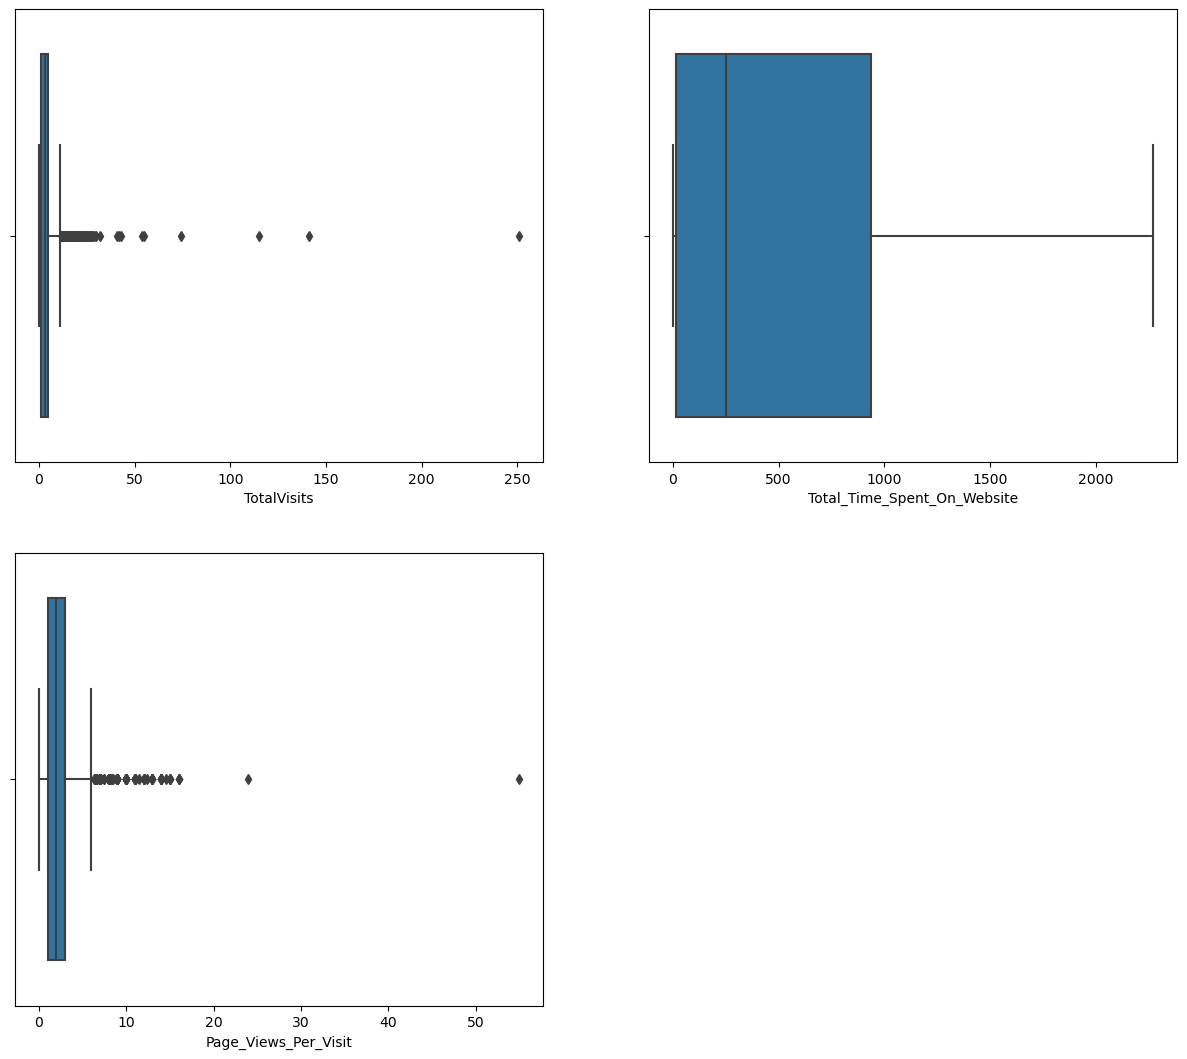

In [42]:
# plotting boxplot graph to find outliers 
plt.figure(figsize = (15,20))
features = lead.iloc[:, 1: 4].columns
for i in enumerate(features):
    plt.subplot(3,2,i[0]+1)
    sns.boxplot(lead[i[1]])

In [43]:
# capping the outliers 
q4t = lead['TotalVisits'].quantile(0.97)
q4p = lead['Page_Views_Per_Visit'].quantile(0.96)

lead['TotalVisits'][lead['TotalVisits']>=q4t] = q4t
lead['Page_Views_Per_Visit'][lead['Page_Views_Per_Visit']>=q4p] = q4p

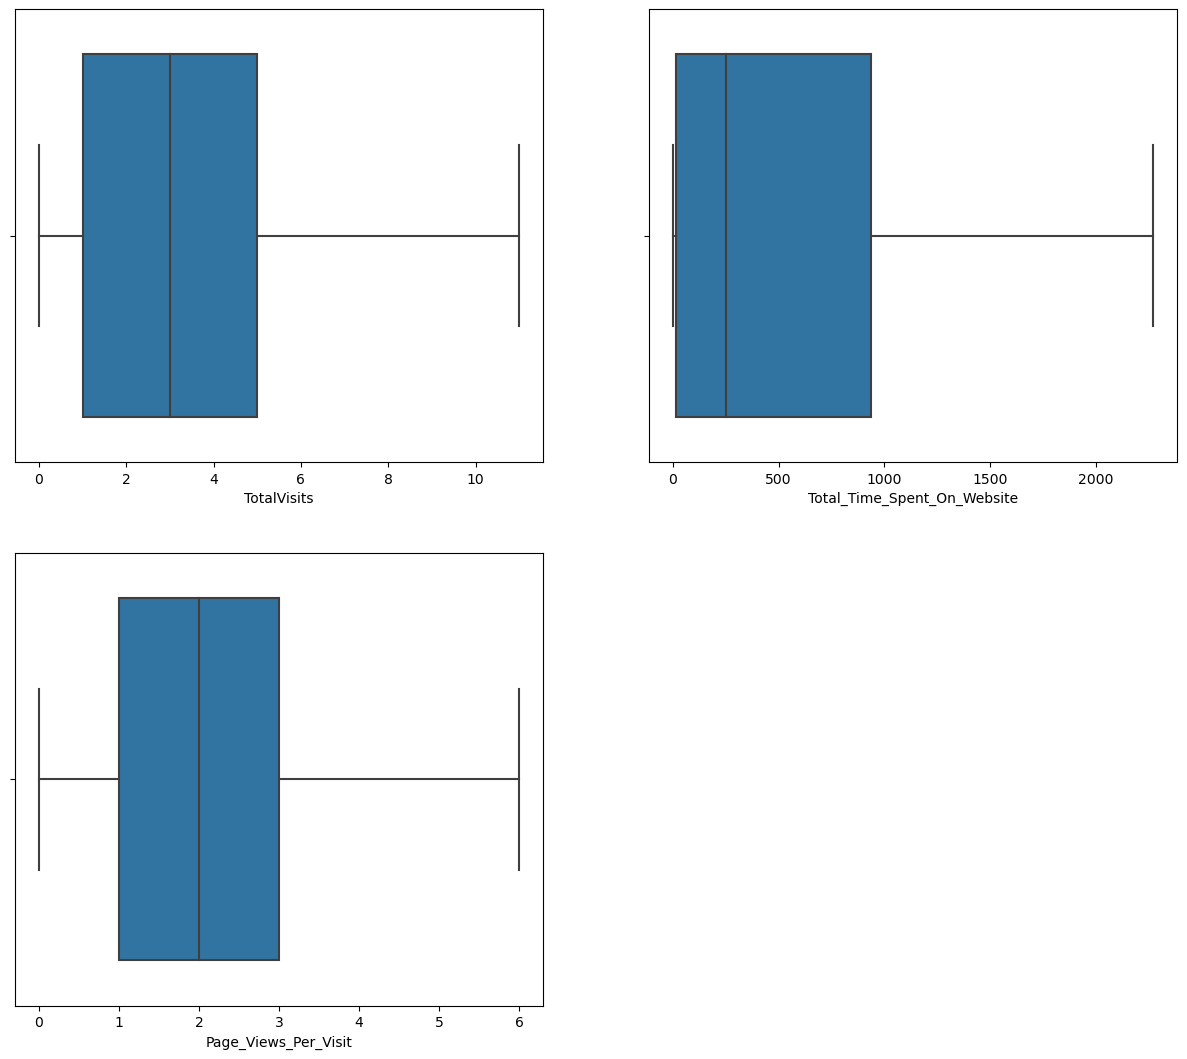

In [44]:
# plotting boxplot graph to find outliers 
plt.figure(figsize = (15,20))
features = lead.iloc[:, 1: 4].columns
for i in enumerate(features):
    plt.subplot(3,2,i[0]+1)
    sns.boxplot(lead[i[1]])

## Train-Test Spliting

In [45]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(lead, train_size=0.7, test_size=0.3, random_state=42)
y_train = df_train.pop('Converted')
X_train = df_train
y_test = df_test.pop('Converted')
X_test = df_test

## Scaling the numerical data

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical = ['TotalVisits', 'Total_Time_Spent_On_Website', 'Page_Views_Per_Visit']
lead[numerical] = scaler.fit_transform(lead[numerical])
lead.head()

,Converted,TotalVisits,Total_Time_Spent_On_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Facebook,Lead_Source_Google,...,City_OTHERS_METRO_CITIES&Tier2,City_Other Cities,City_Other Cities of Maharashtra,City_Thane & Outskirts,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_OTHER,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
0,0,-1.130566,-0.892426,-1.275034,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0.617481,0.337612,0.130853,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,-0.431348,1.903446,-0.150324,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,-0.780957,-0.335807,-0.712679,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,-0.431348,1.713648,-0.712679,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [47]:
# Checking the converted Rate
converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
converted

38.374619730551935

#### We have almost 38% converted rate

 ## Looking at Correlations

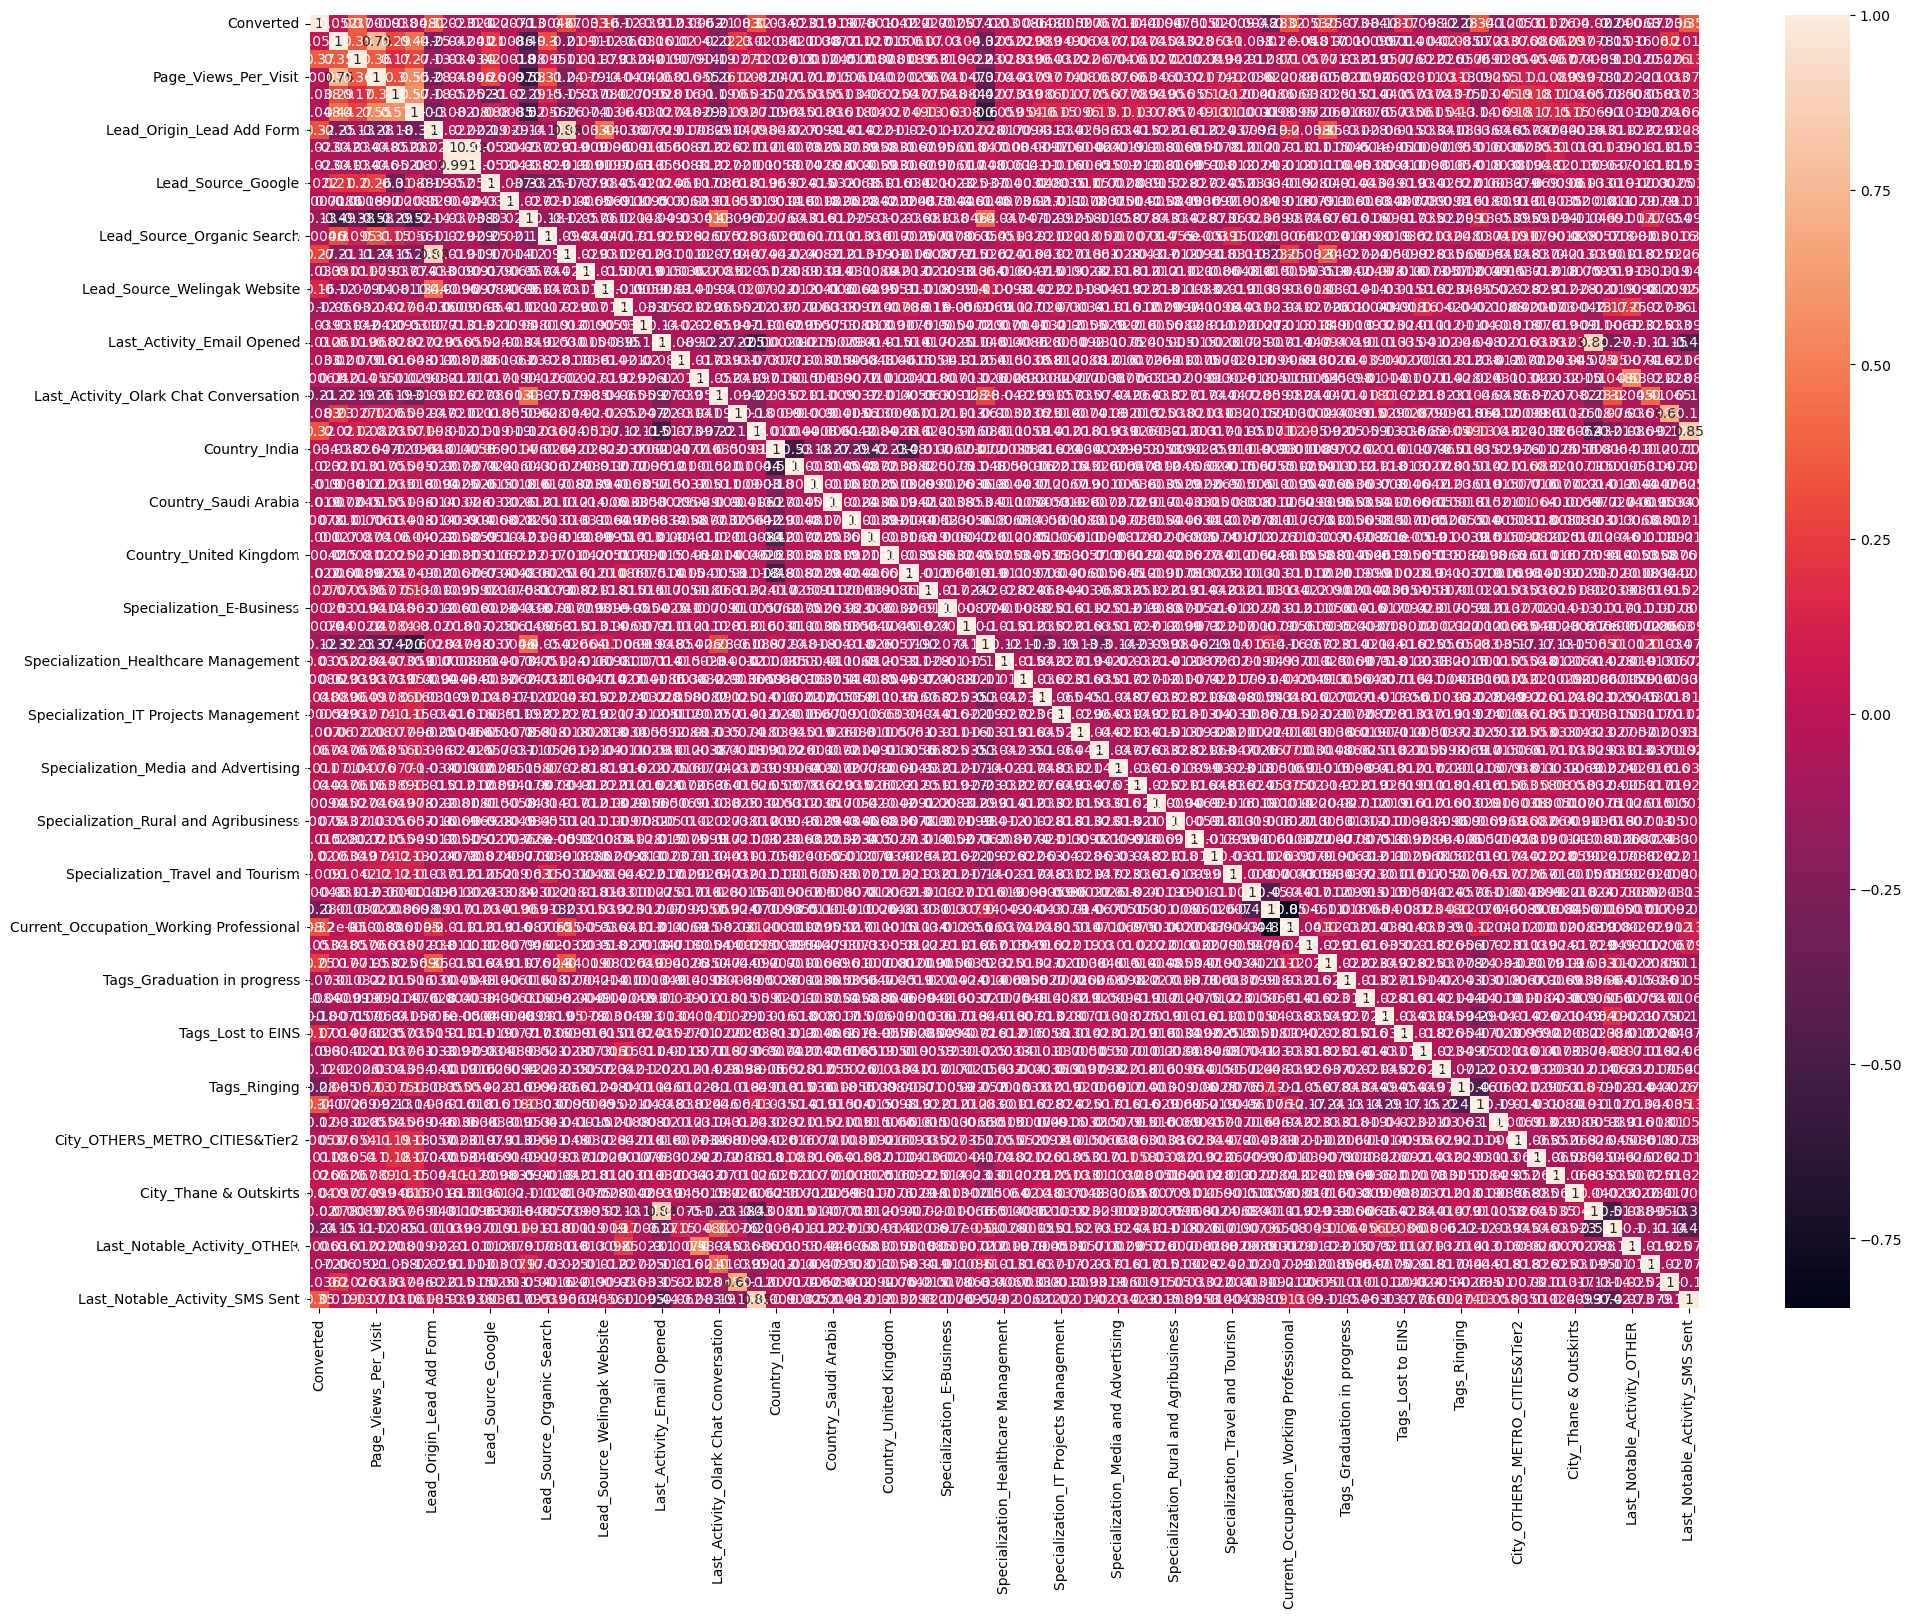

In [48]:
sns.heatmap(lead.corr(), annot=True)
fig = plt.gcf()
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 3.5) 
plt.show()

# Model Building

In [49]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
logml = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6370
Model Family:                Binomial   Df Model:                           71
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1696.5
Date:                Sun, 31 Mar 2024   Deviance:                       3393.0
Time:                        18:09:51   Pearson chi2:                 1.29e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5533
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -5.5122      1.701     -3.240      0.001      -8.847      -2.178
TotalVisits                                       0.0694      0.025      2.808      0.005       0.021       0.118
Total_Time_Spent_On_Website                       0.0022   9.89e-05     21.740      0.000       0.002       0.002
Page_Views_Per_Visit                             -0.1538      0.044     -3.464      0.001      -0.241      -0.067
A_free_copy_of_Mastering_The_Interview           -0.1970      0.144     -1.365      0.172      -0.480       0.086
Lead_Origin_Landing Page Submission              -0.4836      0.155     -3.119      0.002      -0.788      -0.180
Lead_Origin_Lead Add Form                         1.6149      1.338      1.207      0.228      -1.008       4.238
Lead_Origin_Lead Import                           0.5568      0.268      2.081      0.037       0.032       1.081
Lead_Source_Facebook                              0.5568      0.268      2.081      0.037       0.032       1.081
Lead_Source_Google                                0.1548      0.151      1.024      0.306      -0.141       0.451
Lead_Source_OTHERS                               -0.1933      0.652     -0.296      0.767      -1.472       1.085
Lead_Source_Olark Chat                            0.7832      0.207      3.778      0.000       0.377       1.189
Lead_Source_Organic Search                        0.3754      0.179      2.102      0.036       0.025       0.725
Lead_Source_Reference                             1.2484      1.367      0.913      0.361      -1.432       3.928
Lead_Source_Referral Sites                        0.1216      0.373      0.326      0.744      -0.609       0.852
Lead_Source_Welingak Website                      3.7774      1.681      2.247      0.025       0.482       7.072
Last_Activity_Email Bounced                      -1.4728      0.476     -3.094      0.002      -2.406      -0.540
Last_Activity_Email Link Clicked                  0.7778      0.565      1.376      0.169      -0.330       1.886
Last_Activity_Email Opened                        0.5179      0.322      1.610      0.107      -0.112       1.148
Last_Activity_Form Submitted on Website           0.4222      0.475      0.888      0.374      -0.509       1.354
Last_Activity_OTHER                               0.5487      0.496      1.106      0.269      -0.424       1.521
Last_Activity_Olark Chat Conversation            -0.3214      0.335     -0.960      0.337      -0.977       0.335
Last_Activity_Page Visited on Website             0.2340      0.378      0.619      0.536      -0.507       0.975
Last_Activity_SMS Sent                            0.9766      0.306      3.192      0.001       0.377       1.576
Count

## RFE

In [50]:
# running RFE with 20 variables as output
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

lgr = LogisticRegression()
lgr.fit(X_train, y_train)
rfe = RFE(estimator=lgr, n_features_to_select=20)
rfe.fit(X_train, y_train)
rfe

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [51]:
list(zip(X_train.columns, rfe.ranking_, rfe.support_))

[('TotalVisits', 42, False),
 ('Total_Time_Spent_On_Website', 51, False),
 ('Page_Views_Per_Visit', 40, False),
 ('A_free_copy_of_Mastering_The_Interview', 38, False),
 ('Lead_Origin_Landing Page Submission', 14, False),
 ('Lead_Origin_Lead Add Form', 1, True),
 ('Lead_Origin_Lead Import', 28, False),
 ('Lead_Source_Facebook', 7, False),
 ('Lead_Source_Google', 10, False),
 ('Lead_Source_OTHERS', 37, False),
 ('Lead_Source_Olark Chat', 26, False),
 ('Lead_Source_Organic Search', 9, False),
 ('Lead_Source_Reference', 15, False),
 ('Lead_Source_Referral Sites', 41, False),
 ('Lead_Source_Welingak Website', 1, True),
 ('Last_Activity_Email Bounced', 1, True),
 ('Last_Activity_Email Link Clicked', 48, False),
 ('Last_Activity_Email Opened', 1, True),
 ('Last_Activity_Form Submitted on Website', 13, False),
 ('Last_Activity_OTHER', 1, True),
 ('Last_Activity_Olark Chat Conversation', 12, False),
 ('Last_Activity_Page Visited on Website', 50, False),
 ('Last_Activity_SMS Sent', 1, True),
 ('

In [52]:
col = X_train.columns[rfe.support_]
col

Index(['Lead_Origin_Lead Add Form', 'Lead_Source_Welingak Website',
       'Last_Activity_Email Bounced', 'Last_Activity_Email Opened',
       'Last_Activity_OTHER', 'Last_Activity_SMS Sent', 'Country_Qatar',
       'Country_United Kingdom', 'Current_Occupation_Unemployed',
       'Current_Occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last_Notable_Activity_Modified',
       'Last_Notable_Activity_Olark Chat Conversation',
       'Last_Notable_Activity_SMS Sent'],
      dtype='object')

In [53]:
# selected columns in X_train
X_train_col = X_train[col]

# adding constant to selected columns
X_train_col_sm = sm.add_constant(X_train_col)
logml = sm.GLM(y_train, X_train_col_sm, family=sm.families.Binomial())
regression = logml.fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6421
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.5
Date:                Sun, 31 Mar 2024   Deviance:                       4153.1
Time:                        18:09:58   Pearson chi2:                 1.04e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.4973
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.8078      0.317     -8.856      0.000      -3.429      -2.186
Lead_Origin_Lead Add Form                         2.0411      0.258      7.919      0.000       1.536       2.546
Lead_Source_Welingak Website                      2.2237      1.046      2.127      0.033       0.174       4.273
Last_Activity_Email Bounced                      -0.6743      0.306     -2.206      0.027      -1.273      -0.075
Last_Activity_Email Opened                        0.8331      0.128      6.504      0.000       0.582       1.084
Last_Activity_OTHER                               1.2864      0.273      4.710      0.000       0.751       1.822
Last_Activity_SMS Sent                            1.2229      0.168      7.286      0.000       0.894       1.552
Country_Qatar                                   -25.1724   6.65e+04     -0.000      1.000    -1.3e+05     1.3e+05
Country_United Kingdom                            1.7684      1.106      1.599      0.110      -0.400       3.936
Current_Occupation_Unemployed                    -1.6425      0.272     -6.045      0.000      -2.175      -1.110
Current_Occupation_Working Professional           1.0329      0.334      3.090      0.002       0.378       1.688
Tags_Busy                                         3.3183      0.290     11.428      0.000       2.749       3.887
Tags_Closed by Horizzon                           9.0357      1.027      8.800      0.000       7.023      11.048
Tags_Lost to EINS                                 8.3879      0.747     11.236      0.000       6.925       9.851
Tags_Not doing further education                -22.1665    1.9e+04     -0.001      0.999   -3.73e+04    3.73e+04
Tags_Ringing                                     -1.1058      0.289     -3.832      0.000      -1.671      -0.540
Tags_Will revert after reading the email          3.4398      0.197     17.449      0.000       3.053       3.826
Tags_switched off                                -1.3759      0.549     -2.505      0.012      -2.452      -0.300
Last_Notable_Activity_Modified                   -0.8768      0.124     -7.074      0.000      -1.120      -0.634
Last_Notable_Activity_Olark Chat Conversation    -1.1534      0.355     -3.248      0.001      -1.849      -0.457
Last_Notable_Activity_SMS Sent                    1.6864      0.206      8.170      0.000       1.282       2.091
=================================================================================================================
"""

In [54]:
# Checking the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train_col.values, i) for i in range(X_train_col.shape[1])]
vif['Feature'] = X_train_col.columns
vif = vif.sort_values(by='VIF', ascending=False)
vif

,VIF,Feature
11,1.469934,Tags_Closed by Horizzon
1,1.298712,Lead_Source_Welingak Website
16,1.191763,Tags_switched off
2,1.164206,Last_Activity_Email Bounced
10,1.152298,Tags_Busy
18,1.148196,Last_Notable_Activity_Olark Chat Conversation
12,1.118878,Tags_Lost to EINS
13,1.115427,Tags_Not doing further education
4,1.104321,Last_Activity_OTHER
19,1.007991,Last_Notable_Activity_SMS Sent


#### dropping the column which has highest P-value (<5%) or (.05)

In [55]:
# dropping high p-values and vif 
X_train_col.drop('Country_Qatar', axis=1, inplace=True)

In [56]:
# rebuilting the model
# adding constant to selected columns
X_train_col_sm = sm.add_constant(X_train_col)
logml = sm.GLM(y_train, X_train_col_sm, family=sm.families.Binomial())
regression = logml.fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6422
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.0
Date:                Sun, 31 Mar 2024   Deviance:                       4157.9
Time:                        18:09:59   Pearson chi2:                 1.04e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4969
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.8023      0.317     -8.844      0.000      -3.423      -2.181
Lead_Origin_Lead Add Form                         2.0435      0.258      7.929      0.000       1.538       2.549
Lead_Source_Welingak Website                      2.2228      1.046      2.126      0.034       0.173       4.272
Last_Activity_Email Bounced                      -0.6742      0.306     -2.205      0.027      -1.273      -0.075
Last_Activity_Email Opened                        0.8302      0.128      6.486      0.000       0.579       1.081
Last_Activity_OTHER                               1.2852      0.273      4.705      0.000       0.750       1.821
Last_Activity_SMS Sent                            1.2240      0.168      7.292      0.000       0.895       1.553
Country_United Kingdom                            1.7702      1.106      1.601      0.109      -0.397       3.937
Current_Occupation_Unemployed                    -1.6427      0.272     -6.048      0.000      -2.175      -1.110
Current_Occupation_Working Professional           1.0336      0.334      3.093      0.002       0.379       1.688
Tags_Busy                                         3.3184      0.290     11.435      0.000       2.750       3.887
Tags_Closed by Horizzon                           9.0339      1.027      8.798      0.000       7.022      11.046
Tags_Lost to EINS                                 8.3866      0.747     11.234      0.000       6.923       9.850
Tags_Not doing further education                -21.1709   1.15e+04     -0.002      0.999   -2.26e+04    2.26e+04
Tags_Ringing                                     -1.1058      0.288     -3.833      0.000      -1.671      -0.540
Tags_Will revert after reading the email          3.4366      0.197     17.437      0.000       3.050       3.823
Tags_switched off                                -1.3737      0.549     -2.502      0.012      -2.450      -0.298
Last_Notable_Activity_Modified                   -0.8802      0.124     -7.108      0.000      -1.123      -0.638
Last_Notable_Activity_Olark Chat Conversation    -1.1555      0.355     -3.254      0.001      -1.852      -0.460
Last_Notable_Activity_SMS Sent                    1.6747      0.206      8.122      0.000       1.271       2.079
=================================================================================================================
"""

In [57]:
# Checking the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train_col.values, i) for i in range(X_train_col.shape[1])]
vif['Feature'] = X_train_col.columns
vif = vif.sort_values(by='VIF', ascending=False)
vif

,VIF,Feature
10,1.469934,Tags_Closed by Horizzon
1,1.298712,Lead_Source_Welingak Website
15,1.190913,Tags_switched off
2,1.164206,Last_Activity_Email Bounced
9,1.152295,Tags_Busy
17,1.148194,Last_Notable_Activity_Olark Chat Conversation
11,1.118877,Tags_Lost to EINS
12,1.115427,Tags_Not doing further education
4,1.104316,Last_Activity_OTHER
18,1.007932,Last_Notable_Activity_SMS Sent


In [58]:
# dropping high p-values Tags_Not doing further education
X_train_col.drop('Tags_Not doing further education', axis=1, inplace=True)

In [59]:
# rebuilting the model
# adding constant to selected columns
X_train_col_sm = sm.add_constant(X_train_col)
logml = sm.GLM(y_train, X_train_col_sm, family=sm.families.Binomial())
regression = logml.fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6423
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2081.5
Date:                Sun, 31 Mar 2024   Deviance:                       4163.1
Time:                        18:09:59   Pearson chi2:                 1.05e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4965
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.8547      0.318     -8.979      0.000      -3.478      -2.232
Lead_Origin_Lead Add Form                         2.0024      0.254      7.874      0.000       1.504       2.501
Lead_Source_Welingak Website                      2.2634      1.045      2.166      0.030       0.215       4.311
Last_Activity_Email Bounced                      -0.6827      0.305     -2.239      0.025      -1.280      -0.085
Last_Activity_Email Opened                        0.8321      0.128      6.504      0.000       0.581       1.083
Last_Activity_OTHER                               1.2870      0.273      4.716      0.000       0.752       1.822
Last_Activity_SMS Sent                            1.2242      0.168      7.300      0.000       0.896       1.553
Country_United Kingdom                            1.7972      1.109      1.621      0.105      -0.376       3.970
Current_Occupation_Unemployed                    -1.6588      0.272     -6.088      0.000      -2.193      -1.125
Current_Occupation_Working Professional           0.9985      0.334      2.988      0.003       0.344       1.654
Tags_Busy                                         3.3835      0.290     11.655      0.000       2.815       3.952
Tags_Closed by Horizzon                           9.1042      1.027      8.868      0.000       7.092      11.116
Tags_Lost to EINS                                 8.4516      0.746     11.322      0.000       6.988       9.915
Tags_Ringing                                     -1.0375      0.288     -3.599      0.000      -1.603      -0.473
Tags_Will revert after reading the email          3.5033      0.197     17.779      0.000       3.117       3.889
Tags_switched off                                -1.3105      0.549     -2.386      0.017      -2.387      -0.234
Last_Notable_Activity_Modified                   -0.8767      0.124     -7.086      0.000      -1.119      -0.634
Last_Notable_Activity_Olark Chat Conversation    -1.1532      0.355     -3.247      0.001      -1.849      -0.457
Last_Notable_Activity_SMS Sent                    1.6812      0.206      8.157      0.000       1.277       2.085
=================================================================================================================
"""

In [60]:
# Checking the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train_col.values, i) for i in range(X_train_col.shape[1])]
vif['Feature'] = X_train_col.columns
vif = vif.sort_values(by='VIF', ascending=False)
vif

,VIF,Feature
10,1.453123,Tags_Closed by Horizzon
1,1.298685,Lead_Source_Welingak Website
14,1.178276,Tags_switched off
16,1.148181,Last_Notable_Activity_Olark Chat Conversation
9,1.143750,Tags_Busy
2,1.138524,Last_Activity_Email Bounced
11,1.111557,Tags_Lost to EINS
4,1.104310,Last_Activity_OTHER
17,1.007925,Last_Notable_Activity_SMS Sent
6,1.002801,Country_United Kingdom


In [61]:
# Country_United Kingdom have p-values
X_train_col.drop('Country_United Kingdom', axis=1, inplace=True)

In [62]:
# rebuilting the model
# adding constant to selected columns
X_train_col_sm = sm.add_constant(X_train_col)
logml = sm.GLM(y_train, X_train_col_sm, family=sm.families.Binomial())
regression = logml.fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6424
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2082.8
Date:                Sun, 31 Mar 2024   Deviance:                       4165.6
Time:                        18:09:59   Pearson chi2:                 1.05e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4963
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.8422      0.317     -8.964      0.000      -3.464      -2.221
Lead_Origin_Lead Add Form                         1.9999      0.254      7.869      0.000       1.502       2.498
Lead_Source_Welingak Website                      2.2645      1.045      2.167      0.030       0.217       4.312
Last_Activity_Email Bounced                      -0.6858      0.305     -2.250      0.024      -1.283      -0.089
Last_Activity_Email Opened                        0.8297      0.128      6.489      0.000       0.579       1.080
Last_Activity_OTHER                               1.2834      0.273      4.705      0.000       0.749       1.818
Last_Activity_SMS Sent                            1.2203      0.168      7.280      0.000       0.892       1.549
Current_Occupation_Unemployed                    -1.6518      0.272     -6.074      0.000      -2.185      -1.119
Current_Occupation_Working Professional           1.0013      0.334      3.002      0.003       0.347       1.655
Tags_Busy                                         3.3654      0.290     11.621      0.000       2.798       3.933
Tags_Closed by Horizzon                           9.0863      1.026      8.852      0.000       7.075      11.098
Tags_Lost to EINS                                 8.4330      0.746     11.302      0.000       6.971       9.896
Tags_Ringing                                     -1.0542      0.288     -3.663      0.000      -1.618      -0.490
Tags_Will revert after reading the email          3.4872      0.196     17.787      0.000       3.103       3.871
Tags_switched off                                -1.3292      0.549     -2.422      0.015      -2.405      -0.254
Last_Notable_Activity_Modified                   -0.8761      0.124     -7.086      0.000      -1.118      -0.634
Last_Notable_Activity_Olark Chat Conversation    -1.1566      0.355     -3.257      0.001      -1.853      -0.461
Last_Notable_Activity_SMS Sent                    1.6850      0.206      8.177      0.000       1.281       2.089
=================================================================================================================
"""

In [63]:
# Checking the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train_col.values, i) for i in range(X_train_col.shape[1])]
vif['Feature'] = X_train_col.columns
vif = vif.sort_values(by='VIF', ascending=False)
vif

,VIF,Feature
9,1.452962,Tags_Closed by Horizzon
1,1.298685,Lead_Source_Welingak Website
13,1.178015,Tags_switched off
15,1.148115,Last_Notable_Activity_Olark Chat Conversation
8,1.143542,Tags_Busy
2,1.138380,Last_Activity_Email Bounced
10,1.111453,Tags_Lost to EINS
4,1.104249,Last_Activity_OTHER
16,1.007844,Last_Notable_Activity_SMS Sent
7,0.929406,Current_Occupation_Working Professional


#### All variables have a good value of VIF and P-value.We can proceed with making predictions using this Final model.

# Train model evaluation 

In [64]:
# Getting the predicted values on the train set
y_train_pred = regression.predict(X_train_col_sm)
y_train_pred.values

array([0.86972099, 0.00161894, 0.85529279, ..., 0.45582487, 0.34014495,
       0.98956046])

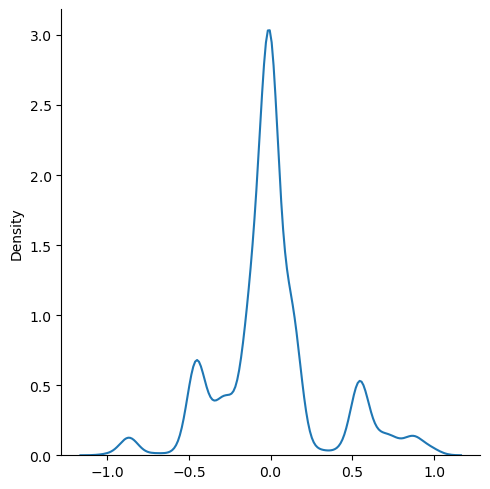

In [65]:
# Checking the Gaussian/Normal distribution
residual = y_train - y_train_pred
sns.displot(residual, kind='kde')
plt.show()

In [66]:
y_train_assumption_pred = pd.DataFrame()
y_train_assumption_pred['ID'] = y_train.index
y_train_assumption_pred['Converted'] = y_train.values
y_train_assumption_pred['ConvertedProb'] = y_train_pred.values
y_train_assumption_pred['Prediction'] = y_train_assumption_pred.ConvertedProb.map(lambda x: 1 if x > 0.5 else 0)
y_train_assumption_pred.head()

,ID,Converted,ConvertedProb,Prediction
0,2835,1,0.869721,1
1,3088,0,0.001619,0
2,8413,1,0.855293,1
3,5015,1,0.869721,1
4,5166,0,0.103082,0


In [67]:
# accuracy and confusion matrix
from sklearn import metrics
print(metrics.accuracy_score(y_train_assumption_pred.Converted, y_train_assumption_pred.Prediction))

confusion = metrics.confusion_matrix(y_train_assumption_pred.Converted, y_train_assumption_pred.Prediction)
confusion

0.8542378143433716


array([[3814,  151],
       [ 788, 1689]], dtype=int64)

In [68]:
# sensitivity and specificity
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
FPR = 1-specificity

print(f'TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}, sensitivity: {sensitivity}, specificity: {specificity}, FalsePositiveRate: {FPR}')

TP: 1689, TN: 3814, FP: 151, FN: 788, sensitivity: 0.6818732337505047, specificity: 0.9619167717528373, FalsePositiveRate: 0.038083228247162704


# ROC curve

#### Finding Optimal Cutoff Point

#### TP: 1689, TN: 3814, FP: 151, FN: 788, sensitivity: 0.6818732337505047, specificity: 0.9619167717528373, FalsePositiveRate: 0.038083228247162704

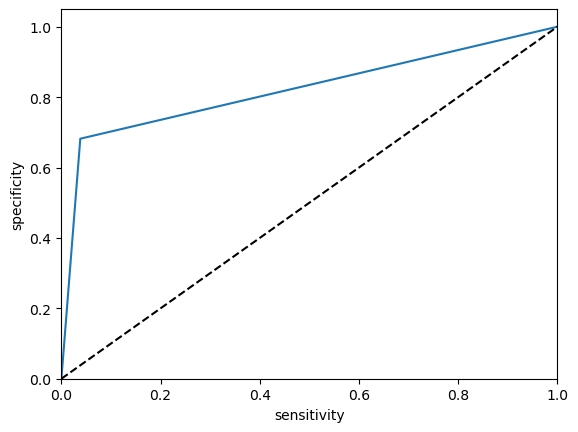

In [69]:
# ROC: Reserved Optimization Characteristic
def ROC(actual, prob):
    fpr, tpr, threshold = metrics.roc_curve(actual, prob, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, prob)
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0.0, 1.5], [0.0, 1.5], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('sensitivity')
    plt.ylabel('specificity')
    return None

ROC(y_train_assumption_pred.Converted, y_train_assumption_pred.Prediction)

#### Since the curve is towards the upper-left corner and the area under the curve (AUC) is more so we have a better  model.

In [70]:
# Optimal threshold
numbers = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for data in numbers:
    y_train_assumption_pred[data] = y_train_assumption_pred.ConvertedProb.apply(lambda x: 1 if x > data else 0)
y_train_assumption_pred.head()

,ID,Converted,ConvertedProb,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,2835,1,0.869721,1,1,1,1,1,1,1,1,1,1,0
1,3088,0,0.001619,0,1,0,0,0,0,0,0,0,0,0
2,8413,1,0.855293,1,1,1,1,1,1,1,1,1,1,0
3,5015,1,0.869721,1,1,1,1,1,1,1,1,1,1,0
4,5166,0,0.103082,0,1,1,0,0,0,0,0,0,0,0


In [71]:
cutOff = pd.DataFrame(columns= ['Prob', 'Accuracy', 'Sensitivity', 'Specificity'])
nums = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in nums:
    cm = metrics.confusion_matrix(y_train_assumption_pred.Converted, y_train_assumption_pred[i])
    total = sum(sum(cm))
    accuracy = (cm[1, 1]+ cm[0, 0])/total
    sensitivity = cm[1, 1]/(cm[1, 1]+ cm[1, 0])
    specificity = cm[0, 0]/(cm[0, 0]+ cm[0, 1])
    cutOff.loc[i] = [i, accuracy, sensitivity, specificity]
cutOff

,Prob,Accuracy,Sensitivity,Specificity
0.0,0.0,0.384508,1.000000,0.000000
0.1,0.1,0.699162,0.979814,0.523834
0.2,0.2,0.792611,0.935406,0.703405
0.3,0.3,0.821329,0.901090,0.771501
0.4,0.4,0.835610,0.867178,0.815889
0.5,0.5,0.854238,0.681873,0.961917
0.6,0.6,0.853151,0.671780,0.966456
0.7,0.7,0.851133,0.663706,0.968222
0.8,0.8,0.848960,0.655632,0.969735
0.9,0.9,0.743713,0.337101,0.997730


#### 0.4 is the optimal threshold value

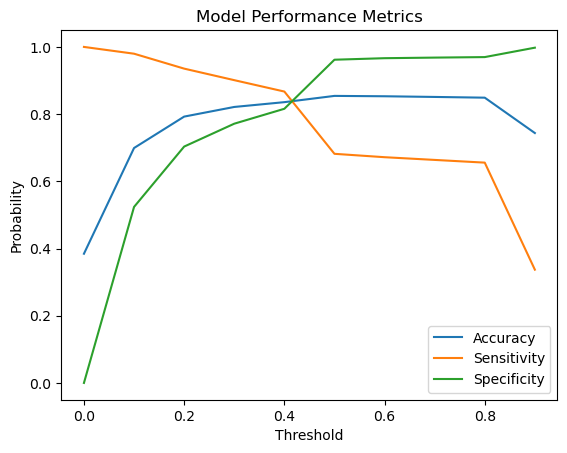

In [72]:
import matplotlib.pyplot as plt

# Assuming 'cutOff' is your DataFrame
plt.plot(cutOff['Accuracy'], label='Accuracy')
plt.plot(cutOff['Sensitivity'], label='Sensitivity')
plt.plot(cutOff['Specificity'], label='Specificity')

plt.xlabel('Threshold')
plt.ylabel('Probability')
plt.title('Model Performance Metrics')
plt.legend()
plt.show()

In [73]:
y_train_assumption_pred['Final_Optimal_Prediction_Threshold'] = y_train_assumption_pred.ConvertedProb.map(lambda x: 1 if x > 0.4 else 0)
y_train_assumption_pred.head()

,ID,Converted,ConvertedProb,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Optimal_Prediction_Threshold
0,2835,1,0.869721,1,1,1,1,1,1,1,1,1,1,0,1
1,3088,0,0.001619,0,1,0,0,0,0,0,0,0,0,0,0
2,8413,1,0.855293,1,1,1,1,1,1,1,1,1,1,0,1
3,5015,1,0.869721,1,1,1,1,1,1,1,1,1,1,0,1
4,5166,0,0.103082,0,1,1,0,0,0,0,0,0,0,0,0


In [74]:
y_train_assumption_pred1 = y_train_assumption_pred[['ID', 'Converted', 'ConvertedProb', 'Final_Optimal_Prediction_Threshold']]
y_train_assumption_pred1.head()

,ID,Converted,ConvertedProb,Final_Optimal_Prediction_Threshold
0,2835,1,0.869721,1
1,3088,0,0.001619,0
2,8413,1,0.855293,1
3,5015,1,0.869721,1
4,5166,0,0.103082,0


## Accuracy and confusion matrix

In [75]:
# accuracy and confusion matrix
from sklearn import metrics
print(metrics.accuracy_score(y_train_assumption_pred.Converted, y_train_assumption_pred.Final_Optimal_Prediction_Threshold))

confusion = metrics.confusion_matrix(y_train_assumption_pred.Converted, y_train_assumption_pred.Final_Optimal_Prediction_Threshold)
confusion

0.835610058987892


array([[3235,  730],
       [ 329, 2148]], dtype=int64)

In [76]:
# sensitivity and specificity
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
FPR = 1-specificity

print(f'TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}, sensitivity: {sensitivity}, specificity: {specificity}, FalsePositiveRate: {FPR}')

TP: 2148, TN: 3235, FP: 730, FN: 329, sensitivity: 0.8671780379491321, specificity: 0.8158890290037831, FalsePositiveRate: 0.18411097099621687


## Precision and Recall

In [77]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_assumption_pred.Converted, y_train_assumption_pred.Final_Optimal_Prediction_Threshold)
confusion

array([[3235,  730],
       [ 329, 2148]], dtype=int64)

##### Precision
TP / TP + FP

In [78]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7463516330785267

##### Recall
TP / TP + FN

In [79]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8671780379491321

#### To check Precision and Recal using sklearn utilities

In [80]:
metrics.precision_score(y_train_assumption_pred.Converted, y_train_assumption_pred.Final_Optimal_Prediction_Threshold)

0.7463516330785267

In [81]:
metrics.recall_score(y_train_assumption_pred.Converted, y_train_assumption_pred.Final_Optimal_Prediction_Threshold)

0.8671780379491321

### Precision and recall tradeoff

In [82]:
p, r, thresholds = metrics.precision_recall_curve(y_train_assumption_pred.Converted, y_train_assumption_pred.ConvertedProb)

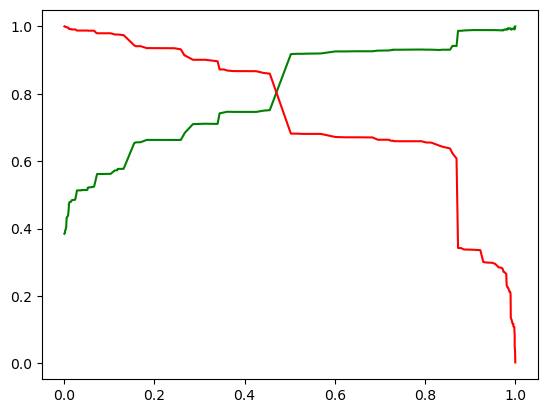

In [83]:
# plotting precision and recall curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### When comparing the cutoff point of Accuracy, Sensitivity and Specificity(0.4) with cutoff point of precision and recall curve(0.49).  We take the optimal cut-off point for our model 0.4 as we are gettting decent values of all the three variable  Accuracy, Sensitivity and Specificity as ~82%

# Making Prediction

In [84]:
X_test.head()

,TotalVisits,Total_Time_Spent_On_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_OTHERS,...,City_OTHERS_METRO_CITIES&Tier2,City_Other Cities,City_Other Cities of Maharashtra,City_Thane & Outskirts,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_OTHER,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
76,6.0,595,3.0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5304,3.0,1379,3.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2092,6.0,422,6.0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
582,3.0,1152,3.0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
93,9.0,838,4.5,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [85]:
# scaling up the numerical columns 
numerical = ['TotalVisits', 'Total_Time_Spent_On_Website', 'Page_Views_Per_Visit']
X_test[numerical] = scaler.transform(X_test[numerical])
X_test.head()

,TotalVisits,Total_Time_Spent_On_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_OTHERS,...,City_OTHERS_METRO_CITIES&Tier2,City_Other Cities,City_Other Cities of Maharashtra,City_Thane & Outskirts,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_OTHER,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
76,0.967090,0.193438,0.412031,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5304,-0.081738,1.624224,0.412031,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2092,0.967090,-0.122284,2.099095,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
582,-0.081738,1.209953,0.412031,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
93,2.015918,0.636909,1.255563,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [86]:
# Now lets's drop the columns which arfe available at X_train_col
X_test_col = X_test[X_train_col.columns]
X_test_col.head()

,Lead_Origin_Lead Add Form,Lead_Source_Welingak Website,Last_Activity_Email Bounced,Last_Activity_Email Opened,Last_Activity_OTHER,Last_Activity_SMS Sent,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_SMS Sent
76,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
5304,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1
2092,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0
582,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
93,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0


In [87]:
X_test_col_sm = sm.add_constant(X_test_col)
y_test_pred = regression.predict(X_test_col_sm)
y_test_pred.values

array([0.92244239, 0.86972099, 0.31337   , ..., 0.13204766, 0.01055594,
       0.10308208])

In [88]:
y_test_pred_final = pd.DataFrame({'Converted': y_test.values, 'ConvertedProb': y_test_pred.values})
y_test_pred_final['Optimal_threshold_Prediction'] = y_test_pred_final.ConvertedProb.map(lambda x: 1 if x > 0.4 else 0)
y_test_pred_final.head()

,Converted,ConvertedProb,Optimal_threshold_Prediction
0,1,0.922442,1
1,1,0.869721,1
2,0,0.313370,0
3,1,0.455825,1
4,0,0.455825,1


In [89]:
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Optimal_threshold_Prediction)

0.8428674873280232

In [90]:
confusion_cm = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Optimal_threshold_Prediction)
confusion_cm

array([[1398,  309],
       [ 125,  930]], dtype=int64)

In [91]:
TP_test = confusion_cm[1, 1]
TN_test = confusion_cm[0, 0]
FP_test = confusion_cm[0, 1]
FN_test = confusion_cm[1, 0]
Sensitivity_test = TP_test/(TP_test+FN_test)
Specificity_test = TN_test/(TN_test+FP_test)
FNR_test = 1-Specificity_test

In [92]:
print(f'TP: {TP_test}, TN: {TN_test}, FP: {FP_test}, FN: {FN_test}, sensitivity: {Sensitivity_test}, specificity: {Specificity_test}, FalsePositiveRate: {FNR_test}')

TP: 930, TN: 1398, FP: 309, FN: 125, sensitivity: 0.8815165876777251, specificity: 0.8189806678383128, FalsePositiveRate: 0.1810193321616872


## train 
accuracy: 0.835610058987892, sensitivity: 0.8671780379491321, specificity: 0.8158890290037831
        
## test
accuracy: 0.8428674873280232, sensitivity: 0.8815165876777251, specificity: 0.8189806678383128

### We got Overall Accuracy = 84% , Sensitivity = 88% and Specificity = 81% 

# Conclusion

### We have  build a model where we have  assigned a lead score to each of the leads so that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.
### We have created the model which has Prediction rate of converting lead in to customer is around 88% and it has Predicting rate non converting lead is around 81% .
### Our final model has an accuracy of 84% of Converting lead into customer.
### We have improved the lead conversion rate from 30% to 84%